In [95]:
import numpy as np
import os
import copy
import warnings

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))

# Load data from local files or from hard drive?

In [96]:
localData = False

In [107]:
nOrb = 3

Nx = 512
Ny = 16
beta = 20
U = 20
initCond = 1

if localData == False:
    
    ## LOAD FILES FROM HARD DRIVE (THEY ARE TOO BIG!). SET PATH BELOW.
    
    ADATA = "ADATA HD710"
    Flash = "Francisco's Flash Drive"

    SAVEDIR = "../../../../../../../Volumes/" + ADATA + "/MScData/MeanFieldTMDnanoribbon/"
    #SAVEDIR = "../../../../../../../Volumes/" + Flash + "/MScData/MeanFieldTMDnanoribbon/"
    
    LOADSUBDIR = SAVEDIR + "Nx=" + str(Nx) +\
        "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + "/"
    
else:
    SAVEDIR = "../plots/MeanFieldTMDnanoribbon/"
    LOADSUBDIR = SAVEDIR + "Nx=" + str(Nx) +\
        "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + "/"

SAVESUBDIR = "../plots/MeanFieldTMDnanoribbon/" + "Nx=" + str(Nx) +\
        "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + "/"
    
if not os.path.exists(SAVESUBDIR):
    os.makedirs(SAVESUBDIR)   


In [108]:
nUp = np.loadtxt(LOADSUBDIR + "nUp.txt")
nDown = np.loadtxt(LOADSUBDIR + "nDown.txt")
eUp = np.loadtxt(LOADSUBDIR + "eUp.txt")
eDown = np.loadtxt(LOADSUBDIR + "eDown.txt")
wUp = np.loadtxt(LOADSUBDIR + "wUp.txt").reshape(Nx, nOrb * Ny, nOrb * Ny)
wDown = np.loadtxt(LOADSUBDIR + "wDown.txt").reshape(Nx, nOrb * Ny, nOrb * Ny)
itSwitch = int(np.loadtxt(LOADSUBDIR + "itSwitch_lastIt_mu.txt")[0])
lastIt = int(np.loadtxt(LOADSUBDIR + "itSwitch_lastIt_mu.txt")[1])
mu = np.loadtxt(LOADSUBDIR + "itSwitch_lastIt_mu.txt")[2]
energies = np.loadtxt(LOADSUBDIR + "energies.txt")

modelParams = np.loadtxt(LOADSUBDIR + "modelParams.txt")
abs_t0 = modelParams[0]
e1 = modelParams[1]
e2 = modelParams[2]
t0 = modelParams[3]
t1 = modelParams[4]
t2 = modelParams[5]
t11 = modelParams[6]
t12 = modelParams[7]
t22 = modelParams[8]

## Band structure

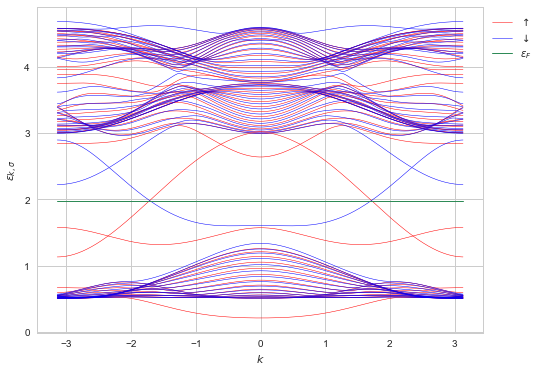

In [109]:
sns.set_style("whitegrid")
ks = np.linspace(-np.pi,np.pi, num=Nx, endpoint=False)
plt.figure(1, figsize=(8, 6))
plt.plot(ks, abs_t0*eUp, markersize=2, linewidth = 0.5, c = 'r', label = r'$\uparrow$')
plt.plot(ks, abs_t0*eDown, markersize=2, linewidth = 0.5, c = 'b', label = r'$\downarrow$')
plt.plot(ks, abs_t0*np.ones(Nx)*mu, c = 'seagreen', linewidth = 1, label = r'$\varepsilon_F$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\varepsilon_{k, \sigma}$')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(SAVESUBDIR + "bands_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta)\
            +"_initCond=" + str(initCond) + ".png", dpi = 500, bbox_inches='tight')

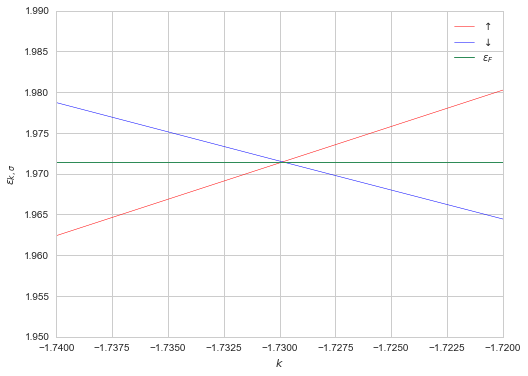

In [59]:
sns.set_style("whitegrid")
ks = np.linspace(-np.pi,np.pi, num=Nx, endpoint=False)
plt.figure(1, figsize=(8, 6))
plt.plot(ks, abs_t0*eUp, markersize=2, linewidth = 0.5, c = 'r', label = r'$\uparrow$')
plt.plot(ks, abs_t0*eDown, markersize=2, linewidth = 0.5, c = 'b', label = r'$\downarrow$')
plt.plot(ks, abs_t0*np.ones(Nx)*mu, c = 'seagreen', linewidth = 1, label = r'$\varepsilon_F$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\varepsilon_{k, \sigma}$')
plt.ylim(1.95, 1.99)
plt.xlim(-1.74, -1.72)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(SAVESUBDIR + "/zoomed_atBandCrossing_bands_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta)\
            +"_initCond=" + str(initCond) + ".png", dpi = 500, bbox_inches='tight')

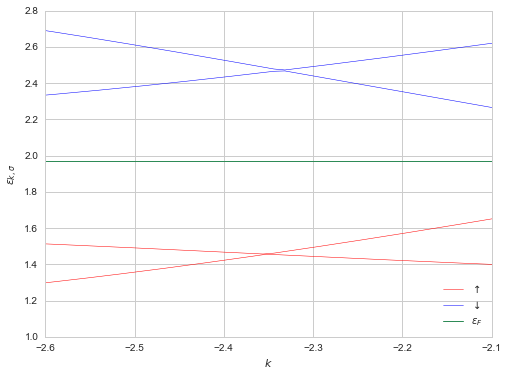

In [60]:
sns.set_style("whitegrid")
ks = np.linspace(-np.pi,np.pi, num=Nx, endpoint=False)
plt.figure(1, figsize=(8, 6))
plt.plot(ks, abs_t0*eUp, markersize=2, linewidth = 0.5, c = 'r', label = r'$\uparrow$')
plt.plot(ks, abs_t0*eDown, markersize=2, linewidth = 0.5, c = 'b', label = r'$\downarrow$')
plt.plot(ks, abs_t0*np.ones(Nx)*mu, c = 'seagreen', linewidth = 1, label = r'$\varepsilon_F$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\varepsilon_{k, \sigma}$')
plt.ylim(1, 2.8)
plt.xlim(-2.6, -2.1)
plt.legend(loc = 4)
plt.savefig(SAVESUBDIR + "/zoomed_atK_bands_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta)\
            + ".png", dpi = 500, bbox_inches='tight')

## Magnetization

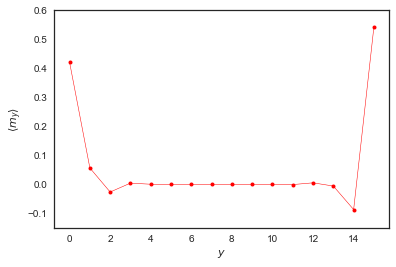

In [110]:
sns.set_style("white")
nUpSite = np.zeros(Ny)
nDownSite = np.zeros(Ny)
for i in range(Ny):    
    nUpSite[i] = nUp[nOrb * i] + nUp[nOrb * i + 1] + nUp[nOrb * i + 2]
    nDownSite[i] = nDown[nOrb * i] + nDown[nOrb * i + 1] + nDown[nOrb * i + 2]
    
plt.plot((nUpSite-nDownSite), markersize=4, linewidth = 0.5, c = 'r', marker = 'o')
plt.ylabel(r'$\left\langle m_y \right\rangle$')
plt.xlabel(r'$y$')
plt.ylim(-0.15, 0.6)
plt.savefig(SAVESUBDIR + "/magProf_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta)\
            + "_initCond=" + str(initCond) + ".png", dpi = 500, bbox_inches='tight')

## Grandpotential minimization

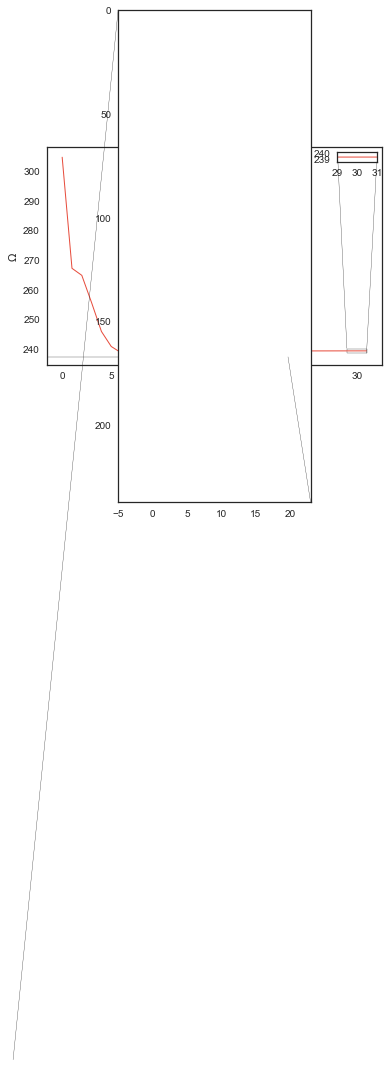

In [112]:
lastNit = 3

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(np.arange(energies[:lastIt].size),\
            energies[:lastIt], color = "#e74c3c", linewidth = 1)
plt.xlabel('Iteration')
plt.ylabel(r'$\Omega$')
axins1 = zoomed_inset_axes(ax, 5, loc=1)
axins2 = zoomed_inset_axes(ax, 0.7, loc=10)
yMargin1 = 0.8
itMargin1 = 2
x1, x2, y1, y2 = lastIt - lastNit, lastIt - 1, energies[lastIt-1] - yMargin1,\
energies[lastIt-1 - lastNit] + yMargin1 # specify the limits
axins1.set_xlim(x1, x2) # apply the x-limits
axins1.set_ylim(y1, y2) # apply the y-limits
mark_inset(ax, axins1, loc1=2, loc2=4, fc="none", ec="0.1")
axins1.plot(np.arange(energies[x1:x2+1].size) + lastIt - lastNit,\
        energies[x1:x2+1], color = "#e74c3c", linewidth = 1)

yMargin2 = 2
itMargin2 = 5
x3, x4, y3, y4 = itSwitch - itMargin2, lastIt - lastNit - 1 - itMargin2,\
energies[lastIt-1] - yMargin2, energies[itSwitch - itMargin2] # specify the limits
axins2.set_xlim(x3, x4) # apply the x-limits
axins2.set_ylim(y3, y4) # apply the y-limits
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.1")
axins2.plot(np.arange(energies[itSwitch-itMargin2:lastIt - lastNit - 1].size) + itSwitch,\
        energies[itSwitch-itMargin2:lastIt-lastNit - 1], color = "#e74c3c", linewidth = 1)

plt.savefig(SAVESUBDIR + "/grandpotMin_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta)\
                        + ".png", dpi = 500)

## Represent the result on the lattice

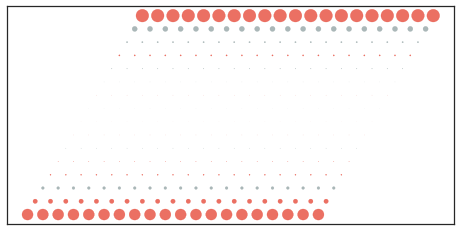

In [71]:
dotscale = 15

longLength = 20

clr = np.chararray((longLength * Ny), itemsize = 10)
        
a1 = np.arange(longLength)
a2 = np.arange(Ny)
vs = np.zeros((longLength * Ny , 2))
lat = np.zeros((longLength * Ny))
v1 = 4*np.array([1, 0])
v2 = 4*np.array([1 / 2, np.sqrt(3) / 2])
for i in range(longLength):
    for j in range(Ny):
            vs[longLength * j + i, :] = \
            a1[i] * v1 + a2[j] * v2 
            lat[longLength * j + i] \
            =  dotscale * longLength * (nUpSite[j]\
                           - nDownSite[j] )
            if (nUpSite[j]\
                - nDownSite[j] ) < 0 :
                clr[longLength * j + i] = "#95a5a6"
            else:
                clr[longLength * j + i] = "#e74c3c"

fig = plt.figure(1, figsize=(8, 4))
ax = fig.add_subplot(111)
ax.scatter(vs[:, 0], vs[:, 1], s = abs(lat), c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax.axis('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.savefig(SAVESUBDIR + "/lattice_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + ".png", dpi = 600)

## Wavefunctions

### Near the K point

In [ ]:
## Find the index(es) of the K point

## U = 20, Ny = 16

Kpoint = -2.35
Ktol = 0.008
idxK = np.where(np.isclose(ks, Kpoint, atol=Ktol) == True)[0][0]
print(idxK)

## Find the index of the edge band
Eedge = 1.45
Etol= 0.1
idxE = np.where(np.isclose(eUp[idxK, :] * abs_t0, Eedge, atol=Etol) == True)[0][0]
print(idxE)

64
15


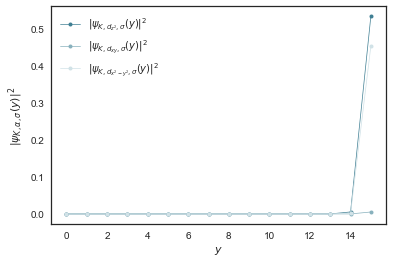

In [69]:
sns.set_style("white")

ks = np.linspace(-np.pi, np.pi, num=Nx, endpoint=False)

## Fill lists

statesUp = wUp[idxE, :, :]
statesDown = wDown[idxE, :, :]

dz2Up = np.zeros(Ny)
dxyUp = np.zeros(Ny)
dx2y2Up = np.zeros(Ny)

dz2Dw = np.zeros(Ny)
dxyDw = np.zeros(Ny)
dx2y2Dw = np.zeros((Ny))

for i in range(Ny):
    dz2Up[i] = statesUp[nOrb * i, idxE]
    dxyUp[i] = statesUp[nOrb * i + 1, idxE]
    dx2y2Up[i] = statesUp[nOrb * i + 2, idxE]
    dz2Dw[i] = statesUp[nOrb * i, idxE]
    dxyDw[i] = statesUp[nOrb * i + 1, idxE]
    dx2y2Dw[i] = statesUp[nOrb * i + 2, idxE]
    
plt.figure(1)
plt.plot(dz2Up, \
         label = \
         r'$| \psi_{K, d_{z^2}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4,
        )
plt.plot(dxyUp, \
        label = \
         r'$| \psi_{K, d_{xy}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4)
plt.plot(dx2y2Up, \
        label = \
         r'$| \psi_{K, d_{x^2 - y^2}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4)
plt.xlabel(r'$y$')
plt.ylabel(r'$| \psi_{K, \alpha, \sigma} (y) |^2$')
plt.legend()
plt.savefig(SAVESUBDIR + "wfAroundK_" + str(Kpoint) +"_Up_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + ".png", dpi = 600)


### A bit to the right

115
16


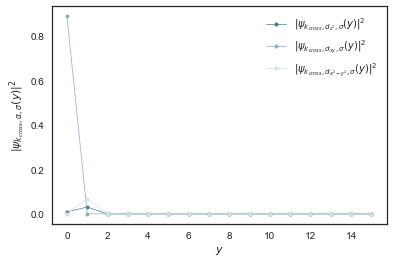

In [70]:
sns.set_style("white")

ks = np.linspace(-np.pi, np.pi, num=Nx, endpoint=False)

## Find the index(es) of the K point

## U = 20, Ny = 16

Kpoint = -1.73
Ktol = 0.008
idxK = np.where(np.isclose(ks, Kpoint, atol=Ktol) == True)[0][0]
print(idxK)

## Find the index of the edge band
Eedge = 1.97
Etol= 0.1
idxE = np.where(np.isclose(eUp[idxK, :] * abs_t0, Eedge, atol=Etol) == True)[0][0]
print(idxE)

## Fill lists

statesUp = wUp[idxE, :, :]
statesDown = wDown[idxE, :, :]

dz2Up = np.zeros(Ny)
dxyUp = np.zeros(Ny)
dx2y2Up = np.zeros(Ny)

dz2Dw = np.zeros(Ny)
dxyDw = np.zeros(Ny)
dx2y2Dw = np.zeros((Ny))

for i in range(Ny):
    dz2Up[i] = statesUp[nOrb * i, idxE]
    dxyUp[i] = statesUp[nOrb * i + 1, idxE]
    dx2y2Up[i] = statesUp[nOrb * i + 2, idxE]
    dz2Dw[i] = statesUp[nOrb * i, idxE]
    dxyDw[i] = statesUp[nOrb * i + 1, idxE]
    dx2y2Dw[i] = statesUp[nOrb * i + 2, idxE]
    
plt.figure(1)
plt.plot(dz2Up, \
         label = \
         r'$| \psi_{k_{cross}, d_{z^2}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4,
        )
plt.plot(dxyUp, \
        label = \
         r'$| \psi_{k_{cross}, d_{xy}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4)
plt.plot(dx2y2Up, \
        label = \
         r'$| \psi_{k_{cross}, d_{x^2 - y^2}, \sigma} (y) |^2$',\
        linewidth = 0.7, marker = 'o', markersize = 4)
plt.xlabel(r'$y$')
plt.ylabel(r'$| \psi_{k_{cross}, \alpha, \sigma} (y) |^2$')
plt.legend()
plt.savefig(SAVESUBDIR + "wfAroundK_" + str(Kpoint) +"_Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + ".png", dpi = 600)